In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

uber = pd.read_csv("C:/Users/HP/Downloads/DS/03-Statistics and Exploratory Data Analytics/Uber Case study/Uber Request Data.csv")
uber.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [39]:
sum(uber.duplicated(subset="Request id")) == 0

True

In [40]:
uber.shape

(6745, 6)

In [42]:
uber.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [ ]:
If driver id is null then driver was not assigned to that particular trip.
Drop timestamp is null means driver was assigned but driver cancelled the trip

In [46]:
round(uber.isnull().sum()/len(uber.index)*100, 2)

Request id            0.00
Pickup point          0.00
Driver id            39.29
Status                0.00
Request timestamp     0.00
Drop timestamp       58.03
dtype: float64

In [60]:
uber["Request timestamp"] = uber["Request timestamp"].astype(str)
uber["Request timestamp"] = uber["Request timestamp"].replace("/", "-")
uber["Request timestamp"] = pd.to_datetime(uber["Request timestamp"], dayfirst=True)

uber["Drop timestamp"] = uber["Drop timestamp"].replace("/", "-")
uber["Drop timestamp"] = pd.to_datetime(uber["Drop timestamp"], dayfirst=True)

In [61]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 9 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
time                 6745 non-null datetime64[ns]
time_slot            6745 non-null object
hour                 6745 non-null int64
dtypes: datetime64[ns](3), float64(1), int64(2), object(3)
memory usage: 474.3+ KB


In [73]:
uber["req_hour"] = uber["Request timestamp"].dt.hour
uber["req_day"] = uber["Request timestamp"].dt.day
#req_hour.value_counts()

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


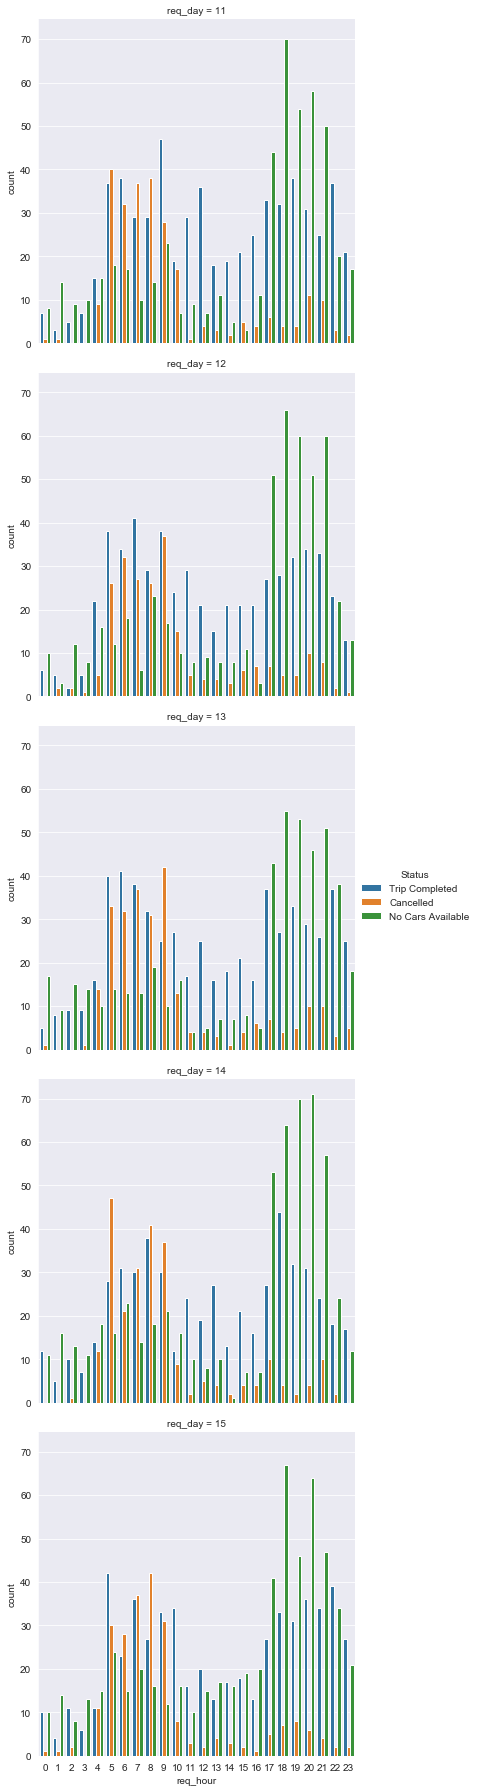

In [75]:
sns.factorplot(data=uber, x="req_hour", hue="Status", row="req_day", kind="count")

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


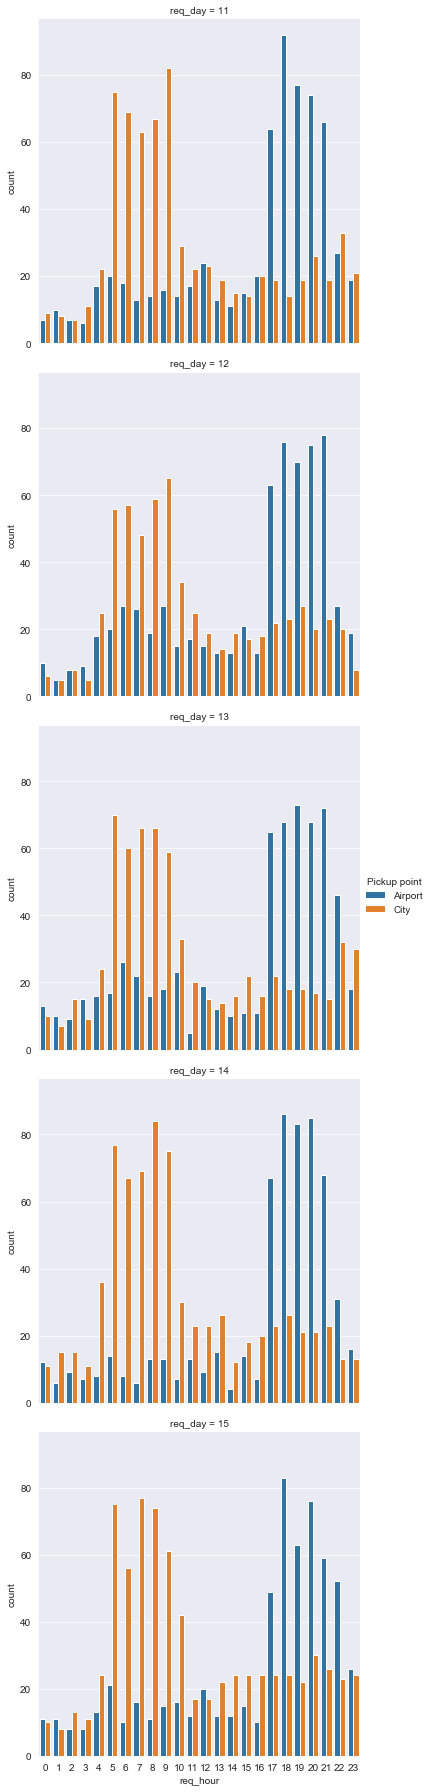

In [76]:
sns.factorplot(data=uber, x="req_hour", hue="Pickup point", row="req_day", kind="count")

In [81]:
def time_period(x):
    if x < 5:
        return "Pre Morning"
    elif 5 <= x < 10:
        return "Morning rush"
    elif 10 <= x < 17:
        return "Day time"
    elif 17 <= x < 22:
        return "Evening rush"
    else:
        return "Late night"
    
uber['time_slot'] = uber["req_hour"].apply(lambda x: time_period(x))

In [84]:
uber['time_slot'].value_counts()

Evening rush    2342
Morning rush    2103
Day time        1224
Pre Morning      578
Late night       498
Name: time_slot, dtype: int64

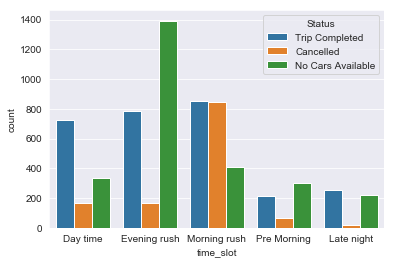

In [85]:
sns.countplot(data=uber, x="time_slot", hue="Status")

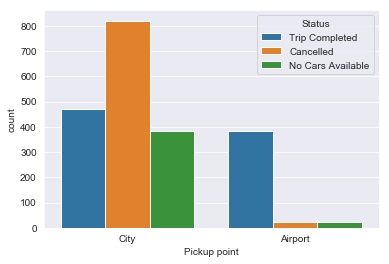

In [90]:
uber_morning_rush = uber[uber['time_slot'] == 'Morning rush']
sns.countplot(x='Pickup point', hue='Status', data=uber_morning_rush)
plt.show()

In [92]:
uber_airport_cancelled = uber_morning_rush[(uber_morning_rush['Pickup point'] == 'Airport') & (uber_morning_rush['Status'] == 'Cancelled')]
len(uber_airport_cancelled.index)

23

In [93]:
uber_airport_cancelled = uber_morning_rush[(uber_morning_rush['Pickup point'] == 'City') & (uber_morning_rush['Status'] == 'Cancelled')]
len(uber_airport_cancelled.index)

820

In [97]:
uber_airport_cancelled = uber_morning_rush[(uber_morning_rush['Pickup point'] == 'City') & (uber_morning_rush['Status'] == 'Trip Completed')]
len(uber_airport_cancelled.index)

472

In [98]:
uber_city_morning_rush = uber_morning_rush[(uber_morning_rush['Pickup point'] == 'City')]
len(uber_city_morning_rush.index)

1677

In [101]:
uber_airport_completed_morning_rush = uber_morning_rush[(uber_morning_rush['Pickup point'] == 'Airport') & (uber_morning_rush['Status'] == 'Trip Completed')]
len(uber_airport_completed_morning_rush.index)

382

In [102]:
uber_airport_morning_rush = uber_morning_rush[(uber_morning_rush['Pickup point'] == 'Airport')]
len(uber_airport_morning_rush.index)

426

In [103]:
#supply and demand during evening rush hours
uber_evening_rush = uber[(uber['time_slot'] == 'Evening rush')]
len(uber_evening_rush.index)

2342

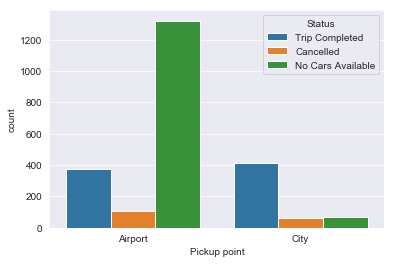

In [104]:
sns.countplot(data=uber_evening_rush , x='Pickup point', hue='Status')
plt.show()

In [105]:
uber_city_completed_evening_rush = uber_evening_rush[(uber_evening_rush['Pickup point'] == 'City') & (uber_evening_rush['Status'] == "Trip Completed")]
len(uber_city_completed_evening_rush.index)

411

In [106]:
uber_city_evening_rush = uber_evening_rush[(uber_evening_rush['Pickup point'] == 'City')]
len(uber_city_evening_rush.index)

542

In [116]:
def piechart(df):
    labels = df.index.values
    sizes = df['Status'].values
    
    fig1, axl = plt.subplots()
    axl.pie(sizes, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)
    axl.axis('equal')
    plt.show()

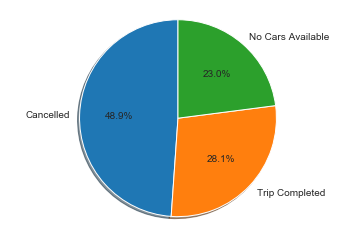

In [126]:
uber_city = uber[(uber['Pickup point'] == 'City') & (uber['time_slot'] == 'Morning rush')]

uber_city_counts = pd.DataFrame(uber_city['Status'].value_counts())
piechart(uber_city_counts)

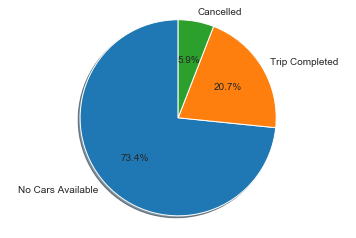

In [128]:
uber_airport = uber[(uber['Pickup point'] == 'Airport') & (uber['time_slot'] == 'Evening rush')]

uber_city_counts = pd.DataFrame(uber_airport['Status'].value_counts())
piechart(uber_city_counts)

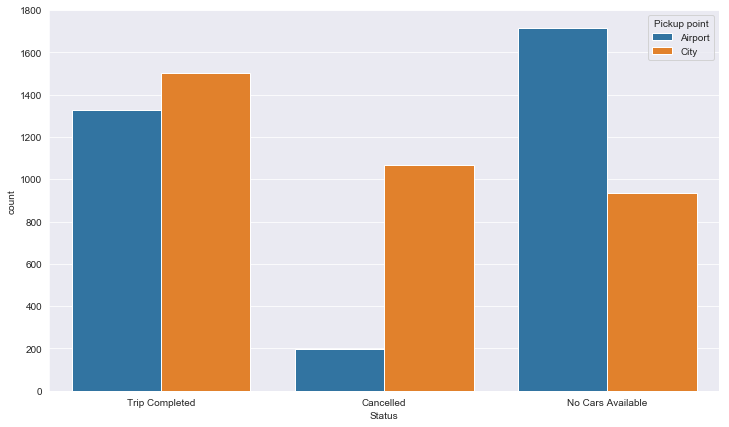

In [94]:
plt.figure(figsize=(12,7))
sns.set_style("darkgrid")
sns.countplot(data=uber, x="Status", hue="Pickup point")
plt.show()

In [47]:
uber["time"] = pd.to_datetime(uber["Request timestamp"])
uber["time_slot"] = uber["time"].dt.time
uber["hour"] = uber["time"].dt.hour
uber.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,time,time_slot,hour
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-11-07 11:51:00,11:51:00,11
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-11-07 17:57:00,17:57:00,17
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,2016-12-07 09:17:00,09:17:00,9
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,2016-12-07 21:08:00,21:08:00,21
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,2016-07-13 08:33:16,08:33:16,8
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59,2016-07-13 21:57:28,21:57:28,21
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15,2016-07-14 06:15:32,06:15:32,6
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52,2016-07-15 05:11:52,05:11:52,5
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51,2016-07-15 17:57:27,17:57:27,17
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25,2016-11-07 06:46:00,06:46:00,6


In [48]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 9 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
time                 6745 non-null datetime64[ns]
time_slot            6745 non-null object
hour                 6745 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 474.3+ KB


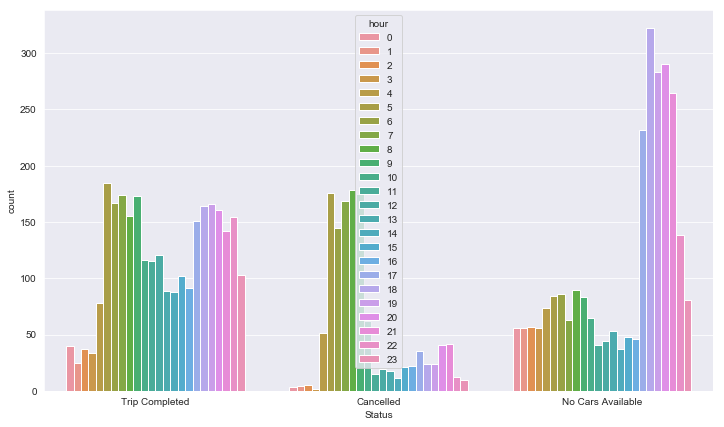

In [27]:
plt.figure(figsize=(12,7))
sns.set_style("darkgrid")
sns.countplot(data=uber, x="Status", hue="hour")
plt.show()

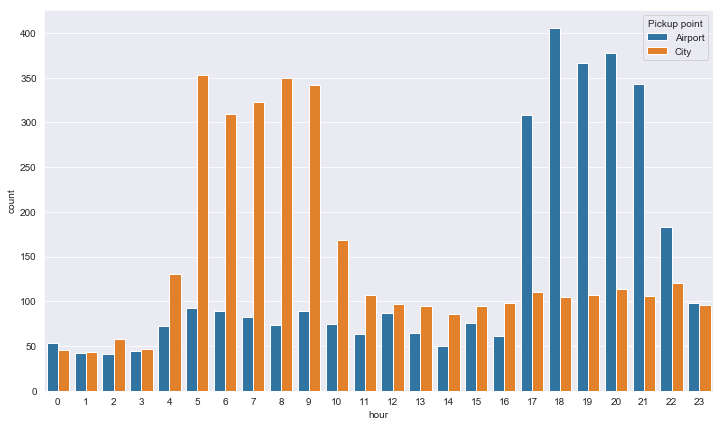

In [80]:
plt.figure(figsize=(12,7))
sns.set_style("darkgrid")
sns.countplot(data=uber, x="hour", hue="Pickup point")
plt.show()